Prisha Dave, DSCI 100 project 2025

## Project question : Can we predict if a player’s age and number of played hours is correlated with whether they have a subscription?

Introduction

Background: Today, lots of online video games, especially Minecraft are becoming a lot more popular for many people. It would be really helpful for companies to see which types of players are subscribed which can allow them to market to those types of players, and that would boost their engagement in the game which would also increase their revenue. Identifying the factors that influence whether a player is subscribed is very useful for game developers, as it allows them to attract players more effectively.

Question: Can we predict if a player’s age and number of played hours is correlated with whether they have a subscription?

Dataset Description: To answer this question, I used the 'players.csv' dataset, which contained all the variables needed for my analysis which were, players age, number of played hours, and their subscription status. The dataset includes 196 rows and 7 columns. The only modification I made was converting the subscribe column into a factor, since it was the response variable in my classification model and needed to be treated as a categorical variable.

In [1]:
#run this first
library(tidyverse)
library(tidymodels)
library(readr)  
library(dplyr) 
library(ggplot2)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
players <- read_csv("players.csv")
players

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


info about the step : Loaded the players.csv file into R and named it players

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


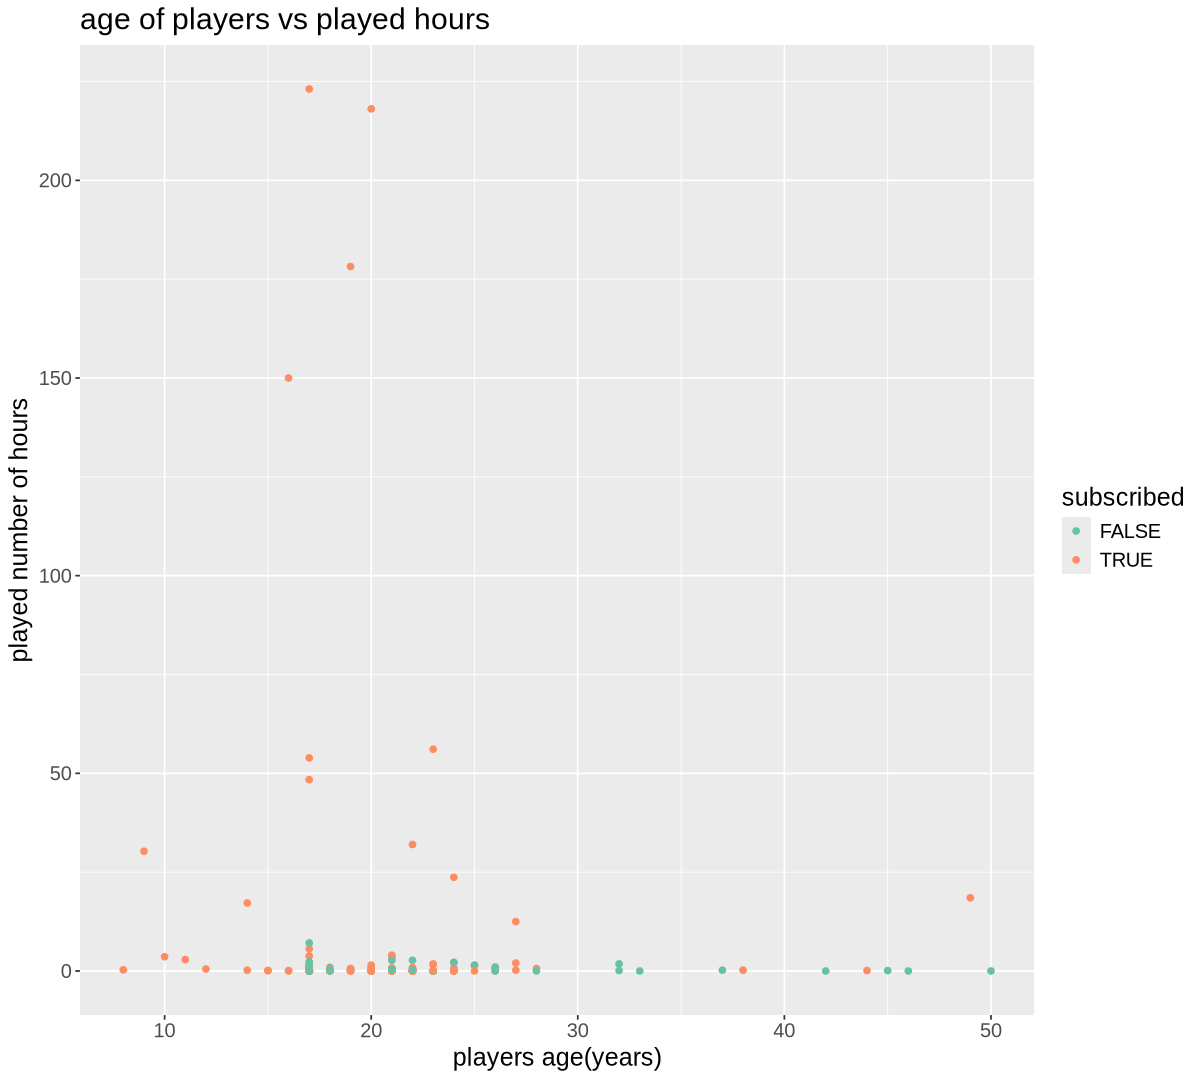

In [3]:
players_plot <- players |>
ggplot(aes(x = Age, y = played_hours, colour = subscribe)) +
    geom_point() +
    scale_color_brewer(palette = "Set2") +
    labs(title = 'age of players vs played hours', x = 'players age(years)', y = 'played number of hours', colour = 'subscribed') + 
    theme(text = element_text(size = 15))
options(repr.plot.height = 9, repr.plot.width = 10)
 players_plot      

To get started with my question, I made a scatterplot to show the relationship between a player's age and the number of hours they played, using subscription status as the colour variable to differentiate between who is subscribed (true) and who is not (false).  I put age on the x-axis and played hours on the y-axis to see whether there were any correlations between age, play hours, and subscription status.  According to this plot, subscribing gamers (in orange) tend to be under the age of 30, with a few over, and seem to have an increased number of played hours.  Non-subscribed gamers (in green) typically look like they have less played hours.  This shows that subscribing gamers are more involved in the game and spend more time playing.

In [4]:
players <- players |>
  mutate(subscribe = as.factor(subscribe))
players

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,17


I converted the subscribe column into a factor so I could use it as the categorical variable in my analysis.

In [5]:
set.seed(333)

data_split <- initial_split(players, prop= 0.75, strata = subscribe)
players_training <- training(data_split)
players_testing <- testing(data_split)
players_training 
players_testing

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18
Beginner,FALSE,fa7d496b2f74c51ec70395bd8397b49f97a3ce8d7ba7e08887d82ec0008137a7,0.0,Umar,Male,24
Regular,FALSE,453774822d52d6891593948224570a750c4334616ff8aa74cd61fad9d4855752,0.0,Edmund,Prefer not to say,23
Amateur,FALSE,5c27e8b9fed2816b006dc8397ec04470b59339fd591a46a3eb7951b939b72984,0.9,Pablo,Male,18
Veteran,FALSE,70db3a16ef58cf8bf6d8658c426ba4a5fcd7523a0abdd413f14466c41181215d,0.1,Lana,Male,22


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Beginner,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17
Amateur,TRUE,ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff,0.5,Marley,Male,17
Regular,TRUE,50cec73a632e4be7b155c3df5165de28b2c5baf092abcb7f509f5645776a56c2,0.0,Iman,Male,17
Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23
Veteran,TRUE,f1b432523542f90c61176a555ccb2144468d76c91a32d74082ab8c101f9d25b6,0.1,London,Male,21


I used the initial_split function to split my data into a training and testing set.  I set the prop to 0.75, which means that 75% of the data is used to train and modify the model, with the remaining 25% used to evaluate how well the model performs on unseen data.  I also set strata = subscribe to make sure that the proportion of subscribed and non-subscribed players remains the same across the training and testing sets.

In [6]:
set.seed(333)
players_training <- players_training |>
drop_na()

players_testing <- players_testing |>
drop_na()

players_training
players_testing

experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,FALSE,2313a06afe47eacc28ff55adf6f072e7d12b0d12d7cbae29656f9029ec72bb53,0.0,Quinlan,Male,22
Amateur,FALSE,200db0417ee70863c7e2a0f214c737476fb86de5869d0b907a077d726357e687,0.1,Anastasia,Female,17
Veteran,FALSE,f8acd26a5e452b682b9f8b20108caef1ee2e745efe08e95806980bd2388a3fea,0.0,Finn,Male,23
Veteran,FALSE,951e54f7376e2b2f0915e9e3646c701af4a2fe839385b13f9e0084b08f8070bd,0.1,Vivienne,Male,18
Beginner,FALSE,fa7d496b2f74c51ec70395bd8397b49f97a3ce8d7ba7e08887d82ec0008137a7,0.0,Umar,Male,24
Regular,FALSE,453774822d52d6891593948224570a750c4334616ff8aa74cd61fad9d4855752,0.0,Edmund,Prefer not to say,23
Amateur,FALSE,5c27e8b9fed2816b006dc8397ec04470b59339fd591a46a3eb7951b939b72984,0.9,Pablo,Male,18
Veteran,FALSE,70db3a16ef58cf8bf6d8658c426ba4a5fcd7523a0abdd413f14466c41181215d,0.1,Lana,Male,22


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<fct>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Pro,TRUE,4caa42e1b20511552434978171dcf7283fb6eb857eb871327e39bfc328002309,0.0,Daniela,Male,17
Beginner,TRUE,4bed6f49b672974f706aa7f020b4f29020326bf594520593557cd381a51559b8,1.5,Sarah,Female,25
Beginner,TRUE,9db37a1d381697f6c83e3b97b276e38bb9d9c811ba4596edb75d4dbfea6415b0,0.0,Elodie,Female,17
Amateur,TRUE,ab1f44f93c3b828f55458971db393052d9711df3e0e7ff69540bfebfcec555ff,0.5,Marley,Male,17
Regular,TRUE,50cec73a632e4be7b155c3df5165de28b2c5baf092abcb7f509f5645776a56c2,0.0,Iman,Male,17
Amateur,TRUE,710148466b44cb02ba894aa9005a4892e619250ebd01153055d6c7578fc1ea10,0.1,Ayman,Male,23
Veteran,TRUE,f1b432523542f90c61176a555ccb2144468d76c91a32d74082ab8c101f9d25b6,0.1,London,Male,21


In this step, I used drop_na to remove any rows with missing values from the training and testing sets, so my model is only trained and evaluated on complete data. 

In [7]:
set.seed(333)
players_vfold <- vfold_cv(players_training, v = 5, strata = subscribe)

players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>  
step_scale(all_predictors()) |>  
step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")
knn_spec

k_vals <- tibble(neighbors = seq(from = 1, to = 30, by = 2))

knn_results <- workflow() |>  
add_recipe(players_recipe) |>  
add_model(knn_spec) |>  
tune_grid(resamples = players_vfold, grid = k_vals) |> 
collect_metrics()

accuracies <- knn_results |>  
filter(.metric == "accuracy")
accuracies

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.4883087,5,0.047100809,Preprocessor1_Model01
3,accuracy,binary,0.5771100,5,0.061889986,Preprocessor1_Model02
5,accuracy,binary,0.5559113,5,0.040675906,Preprocessor1_Model03
7,accuracy,binary,0.5706732,5,0.046766319,Preprocessor1_Model04
9,accuracy,binary,0.6596552,5,0.058201794,Preprocessor1_Model05
11,accuracy,binary,0.6782266,5,0.032364386,Preprocessor1_Model06
13,accuracy,binary,0.6991790,5,0.024977091,Preprocessor1_Model07
15,accuracy,binary,0.6791790,5,0.030075468,Preprocessor1_Model08
17,accuracy,binary,0.6996552,5,0.026138750,Preprocessor1_Model09


The next step I took was training my model. First I did 5-fold cross validation so everytime I trained my model, there would be 4 fold for training and the 1 fold for testing, and then finally find the mean to get more accurate results. Then created a recipe to scale and center the two predictors (age and played hours), because KNN is sensitive to differences in scale and having unstandardized variables could affect the results. Then I specified the KNN model and set it to tune the number of neighbours. I tested values of K from 1 to 30 (by 2) using tune_grid and evaluated how accurately the model performed with each K value by filtering the results to view the accuracy scores.

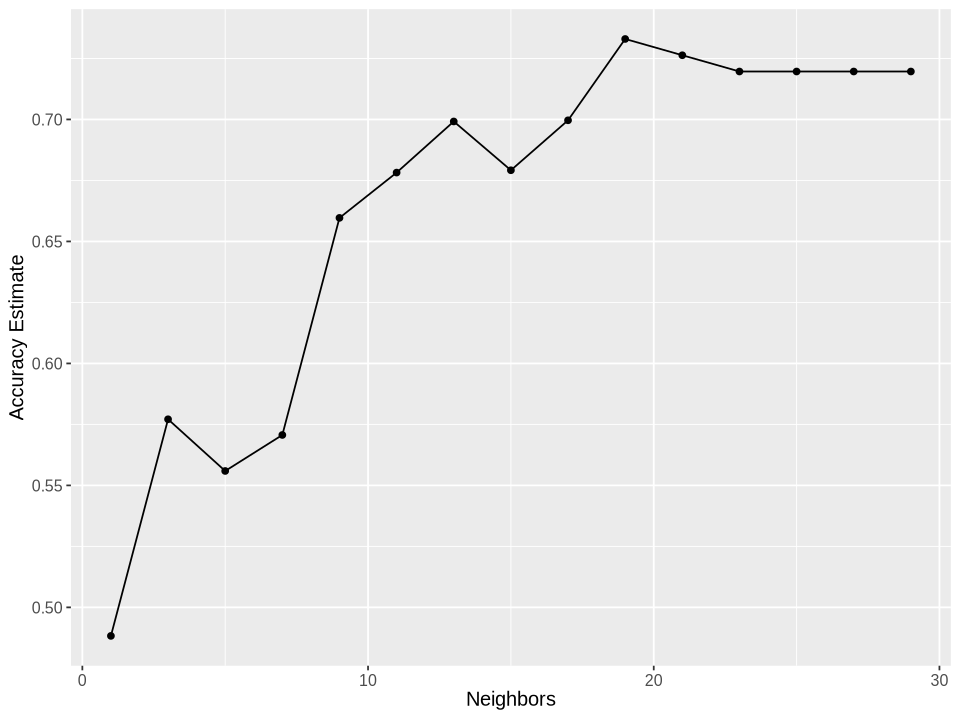

In [8]:
set.seed(333)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +  
geom_point() +  
geom_line() +  
labs(x = "Neighbors", y = "Accuracy Estimate") +  
theme(text = element_text(size = 12))
options(repr.plot.height = 6, repr.plot.width = 8)
accuracy_vs_k

In [9]:
best_k <- accuracies |>        
arrange(desc(mean)) |>        
head(1) |>        
pull(neighbors)

best_k

[1] 19

After tuning the model and testing different K values, I created a visualization to see how accuracy changed with each value of K. From the plot, I observed that accuracy slowly increased as the number of neighbours increased, then it reached a peak, and then started to decline. To find the best K, I filtered the results to find the value that gave the highest average accuracy score. Based on this, I found that K=19 was the best choice for my model.

In [10]:
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_training) |>  
step_scale(all_predictors()) |>  
step_center(all_predictors())

knn_spec2 <- nearest_neighbor(weight_func = "rectangular", neighbors = best_k) |> 
set_engine("kknn") |> 
set_mode("classification")

knn_fit <- workflow() |>  
add_recipe(players_recipe) |>  
add_model(knn_spec2) |>  
fit(data = players_training)
knn_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(19,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2739726
Best kernel: rectangular
Best k: 19

After using the graph to identify which K value gave the best accuracy, I found that  K=19 performed the best. I then reused the same recipe to scale and center the predictors (age and played hours) and built the final K-NN model, this time specifying the best K value. 

In [11]:
players_predictions <- predict(knn_fit, players_testing) |>  
bind_cols(players_testing)

players_predictions |>  
metrics(truth = subscribe, estimate = .pred_class) |>  
filter(.metric == "accuracy")

players_predictions |> 
precision(truth = subscribe, estimate = .pred_class, event_level = "first")

players_predictions |> 
recall(truth = subscribe, estimate = .pred_class, event_level = "first")


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7916667


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,1


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.2307692


In [12]:
confusion <- players_predictions |>             
conf_mat(truth = subscribe, estimate = .pred_class)
confusion

          Truth
Prediction FALSE TRUE
     FALSE     3    0
     TRUE     10   35

After I trained my final model where K=19, I evaluated it to see how well it performs on unseen data using the testing set. I calculated three metrics (accuracy, precision, and recall). The model had a final accuracy of 79%. The precision was 1, which means that whenever the model predicted someone was subscribed, it was always correct. But, the recall was low at only 23%, meaning the model missed many actual subscribed players. This shows that while the model had a perfect precision, it didn't identify all the true positives good.

Prediction,Truth,n
<chr>,<chr>,<dbl>
FALSE,FALSE,3
TRUE,FALSE,10
FALSE,TRUE,0
TRUE,TRUE,35


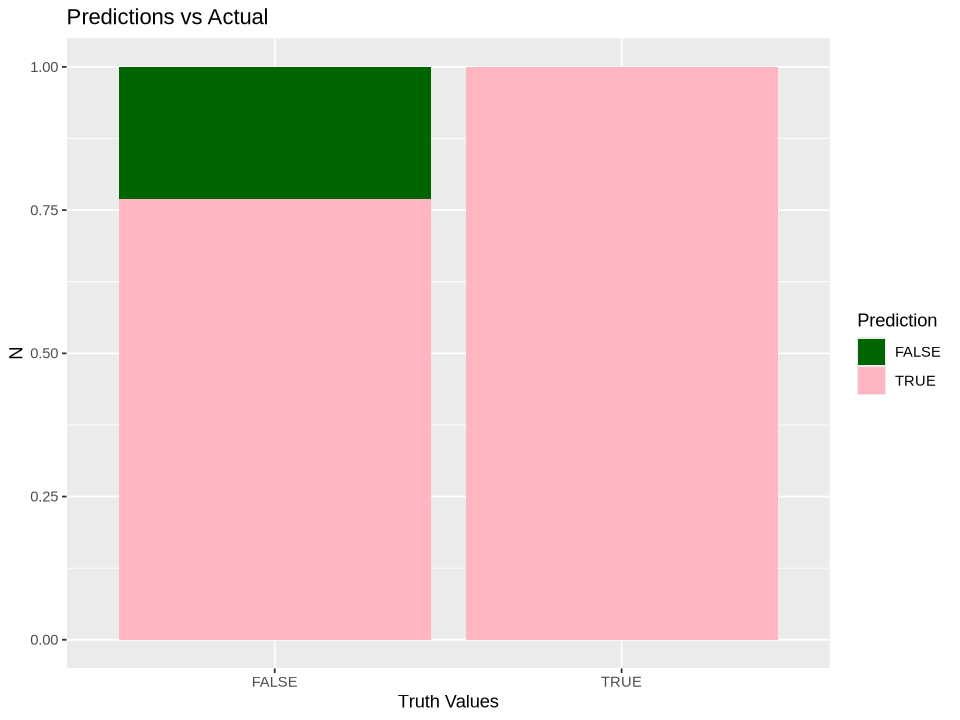

In [13]:
confusion_df <- as_tibble(confusion$table)
confusion_df

players_bar_plot <- confusion_df|>
    ggplot(aes(x = Truth, y = n, fill = Prediction )) + 
    geom_bar(stat = "identity", position = "fill") +
    xlab("Truth Values") +
    ylab("N") +
    labs(fill = "Prediction") +
    scale_fill_manual(values = c("darkgreen", "lightpink")) +
    ggtitle("Predictions vs Actual")
options(repr.plot.height = 6, repr.plot.width = 8)
players_bar_plot

Discussion: From my model and analysis, I found that when K = 19, the KNN classification model was able to predict whether a player was subscribed with an accuracy of 79%. After using the conf_mat function to see what kind of mistakes the model made and where, I could come to the conclution that the model was very good at predicting players who were subscribed, but due to the low recall rate of 23%, it struggled to correctly identify many players who actually were subscribed.

This result was surprising to me, especially seeing the precision score of 1. I expected the model to be less perfect in its precision and a bit more balanced overall, ideally with a higher recall, but that would be a dream scenario. The fact that it predicted all positives correctly when it did predict them, but still missed so many actual positives, suggests that it’s being overly specific. It seems to favour minimizing false positives over catching all true positives, which leads me to believe the model may be slightly underfitting the data.

These findings could be useful for developers when they want to see how the players engage with their Minecraft game. While the model is good in who it predicts to be subscribed, it isn’t the best at detecting the actual subscribers so some of the subscribed users might get skipped over.

For future work, I’d like to explore different models or features, such as including experience level or gender, to see if they improve recall. I’m also interested in trying models like decision trees or logistic regression to compare performance and reduce this prediction gap.